# Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import  AdaBoostClassifier, ExtraTreesClassifier, RandomForestClassifier
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.preprocessing import MinMaxScaler

ModuleNotFoundError: No module named 'numpy'

# Load Dataset

In [5]:
df = pd.read_csv('/content/Student Depression Dataset.csv')
df.head()

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0


# Data Preprocessing

In [6]:
df = df.drop({'id','Profession','City','Job Satisfaction','Work Pressure'}, axis=1)

In [7]:
df.head()

,Gender,Age,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,Male,33.0,5.0,8.97,2.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,Female,24.0,2.0,5.90,5.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
2,Male,31.0,3.0,7.03,5.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0
3,Female,28.0,3.0,5.59,2.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1
4,Female,25.0,4.0,8.13,3.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0


In [9]:
label_encoders = {
    'Gender': LabelEncoder(),
    'Sleep Duration': LabelEncoder(),
    'Dietary Habits': LabelEncoder(),
    'Degree': LabelEncoder(),
    'Have you ever had suicidal thoughts ?': LabelEncoder(),
    'Family History of Mental Illness': LabelEncoder()
}

for feature, encoder in label_encoders.items():
    df[feature] = encoder.fit_transform(df[feature])

    print(f"\nMapping feature '{feature}':")
    for category, value in zip(encoder.classes_, range(len(encoder.classes_))):
        print(f"{category} -> {value}")

print("\nDataFrame after Label Encoding:")
df.head()


Mapping feature 'Gender':
0 -> 0
1 -> 1

Mapping feature 'Sleep Duration':
0 -> 0
1 -> 1
2 -> 2
3 -> 3
4 -> 4

Mapping feature 'Dietary Habits':
0 -> 0
1 -> 1
2 -> 2
3 -> 3

Mapping feature 'Degree':
0 -> 0
1 -> 1
2 -> 2
3 -> 3
4 -> 4
5 -> 5
6 -> 6
7 -> 7
8 -> 8
9 -> 9
10 -> 10
11 -> 11
12 -> 12
13 -> 13
14 -> 14
15 -> 15
16 -> 16
17 -> 17
18 -> 18
19 -> 19
20 -> 20
21 -> 21
22 -> 22
23 -> 23
24 -> 24
25 -> 25
26 -> 26
27 -> 27

Mapping feature 'Have you ever had suicidal thoughts ?':
0 -> 0
1 -> 1

Mapping feature 'Family History of Mental Illness':
0 -> 0
1 -> 1

DataFrame after Label Encoding:


,Gender,Age,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,1,33.0,5.0,8.97,2.0,0,0,3,1,3.0,1.0,0,1
1,0,24.0,2.0,5.90,5.0,0,1,10,0,3.0,2.0,1,0
2,1,31.0,3.0,7.03,5.0,2,0,5,0,9.0,1.0,1,0
3,0,28.0,3.0,5.59,2.0,1,1,7,1,4.0,5.0,1,1
4,0,25.0,4.0,8.13,3.0,0,1,17,1,1.0,1.0,0,0


# Feature Importance

In [17]:
X = df.drop('Depression', axis=1)
y = df['Depression']

## Extra Tree

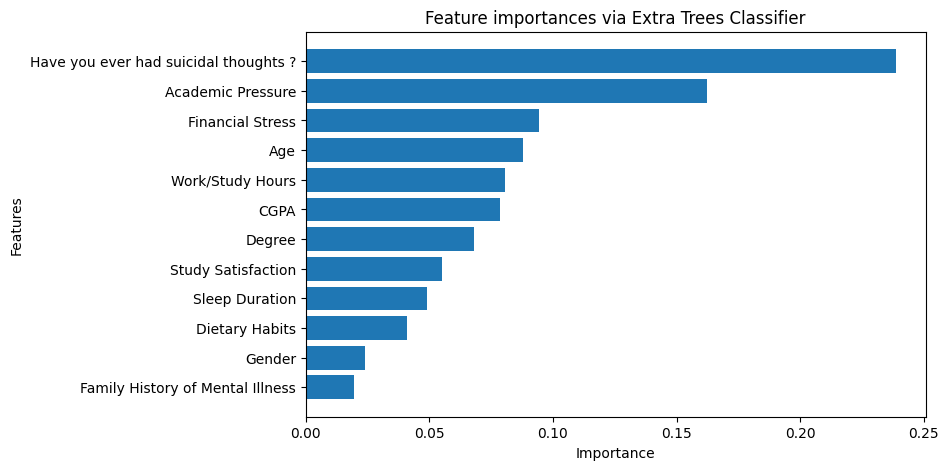

Top features from 1 to 5: ['Have you ever had suicidal thoughts ?', 'Academic Pressure', 'Financial Stress', 'Age', 'Work/Study Hours']


In [26]:
# Fit Extra Trees Classifier
extra_trees_classifier = ExtraTreesClassifier().fit(X, y)

# Get feature importances
importances = extra_trees_classifier.feature_importances_
feature_names = X.columns

# Sort the importances in ascending order
sorted_indices = np.argsort(importances)  # Sort in ascending order
sorted_importances = importances[sorted_indices]
sorted_feature_names = feature_names[sorted_indices].tolist()  # Convert to list

# Plotting feature importances
plt.figure(figsize=(8, 5))
plt.barh(sorted_feature_names, sorted_importances)
plt.xlabel("Importance")
plt.ylabel("Features")
plt.title("Feature importances via Extra Trees Classifier")
plt.show()

# Get top n features (the most important ones)
top_n = 5
top_indices = np.argsort(importances)[-top_n:]  # Get indices of the top n features
top_feature_names = feature_names[top_indices].tolist()  # Convert to list
top_importances = importances[top_indices]  # Get corresponding importances

# Sort the top features by importance in descending order
sorted_top_indices = np.argsort(top_importances)[::-1]  # Sort top importances in descending order
top_feature_names = [top_feature_names[i] for i in sorted_top_indices]  # Sort feature names accordingly

# Print top features from top 1 to top 5
print("Top features from 1 to 5:", top_feature_names)

## Random Forest

In [28]:
# Fit Random Forest Classifier
random_forest_classifier = RandomForestClassifier().fit(X, y)

# Get feature importances
importances = random_forest_classifier.feature_importances_
feature_names = X.columns

# Sort importances and feature names in ascending order for plotting
sorted_indices = np.argsort(importances)  # Sort in ascending order
sorted_importances = importances[sorted_indices]
sorted_feature_names = feature_names[sorted_indices].tolist()  # Convert to list

# Create bar plot using Plotly
fig = px.bar(
    x=sorted_importances,
    y=sorted_feature_names,
    orientation='h',
    labels={'x': 'Importance', 'y': 'Features'},
    title="Feature Importances via Random Forest Classifier"
)

fig.update_layout(
    xaxis_title="Importance",
    yaxis_title="Features",
    title_x=0.5
)

fig.show()

# Get top n features (the most important ones)
top_n = 5
top_indices = np.argsort(importances)[-top_n:]  # Get indices of the top n features
top_feature_names = feature_names[top_indices].tolist()  # Convert to list
top_importances = importances[top_indices]  # Get corresponding importances

# Sort the top features by importance in descending order
sorted_top_indices = np.argsort(top_importances)[::-1]  # Sort top importances in descending order
top_feature_names = [top_feature_names[i] for i in sorted_top_indices]  # Sort feature names accordingly

# Print top features from top 1 to top 5
print("Top features from 1 to 5:", top_feature_names)

Top features from 1 to 5: ['Have you ever had suicidal thoughts ?', 'Academic Pressure', 'CGPA', 'Financial Stress', 'Age']


In [29]:
rf = RandomForestClassifier(criterion='entropy', random_state=42)
rf.fit(X, y)

feature_importance = rf.feature_importances_

importance_df = pd.DataFrame({'Feature': X.columns,
                              'Information Gain': feature_importance})

importance_df = importance_df.sort_values(by='Information Gain', ascending=False)

print("Feature Importance:")
print(importance_df)


Feature Importance:
                                  Feature  Information Gain
8   Have you ever had suicidal thoughts ?          0.188313
2                       Academic Pressure          0.154897
3                                    CGPA          0.117754
1                                     Age          0.100191
10                       Financial Stress          0.091835
9                        Work/Study Hours          0.086018
7                                  Degree          0.082888
4                      Study Satisfaction          0.052414
5                          Sleep Duration          0.043723
6                          Dietary Habits          0.039966
0                                  Gender          0.021266
11       Family History of Mental Illness          0.020735


## Ada Boost

In [30]:
model = AdaBoostClassifier()
scaler = MinMaxScaler()

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

scaler.fit(X_train)

MinMaxScaler()

In [31]:
cv_values = [5, 10, 15, 20]
n_iterations = 5

for iteration in range(n_iterations):
    print(f"Iteration {iteration + 1}:")
    performance_scores = {}

    for cv in cv_values:
        # score = ['accuracy','precision','recall']
        scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='accuracy', verbose=1)
        performance_scores[cv] = np.abs(np.mean(scores))

    print(performance_scores)


Iteration 1:


ValueError: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_weight_boosting.py", line 130, in fit
    X, y = validate_data(
           ^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py", line 2961, in validate_data
    X, y = check_X_y(X, y, **check_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py", line 1370, in check_X_y
    X = check_array(
        ^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py", line 1107, in check_array
    _assert_all_finite(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py", line 120, in _assert_all_finite
    _assert_all_finite_element_wise(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py", line 169, in _assert_all_finite_element_wise
    raise ValueError(msg_err)
ValueError: Input X contains NaN.
AdaBoostClassifier does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values


# Sampai sini dulu

In [ ]:
X,y = df.drop('Depression', axis=1), df['Depression']

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.preprocessing import MinMaxScaler

In [ ]:
model = ExtraTreesRegressor()
scaler = MinMaxScaler()

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

scaler.fit(X_train)


In [ ]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.model_selection import cross_val_score

cv_values = [5, 10, 15, 20]

performance_scores = {}

for cv in cv_values:
    scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='neg_mean_squared_error')
    performance_scores[cv] = np.mean(scores)

print(performance_scores)
# scores = cross_val_score(model, X_train, y_train, scoring = 'neg_mean_squared_error', cv=5)
# scores

In [ ]:
from sklearn.metrics import r2_score

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mse = abs(scores.mean())
r2 = r2_score(y_test, y_pred)

print("MSE scores:", mse)
print("RMSE scores:", np.sqrt(mse))
print ("R2:", r2 )

In [ ]:
# prompt: Extra Tree Classifier

from sklearn.ensemble import ExtraTreesClassifier

# Assuming df is your DataFrame and 'O2Content' is the target variable
X = df.drop('O2Content', axis=1)
y = df['O2Content']

# Create the Extra Trees classifier
etc = ExtraTreesClassifier(n_estimators=100, random_state=0)

# Fit the model
etc.fit(X, y)

# Get the feature importances
importances = etc.feature_importances_
feature_names = X.columns

# Print the feature importances
for feature, importance in zip(feature_names, importances):
    print(f"{feature}: {importance}")



In [ ]:
plt.scatter(y_test, y_pred, alpha=0.5, color='blue', label='Predicted')

# Plotting a line for perfect predictions for reference
plt.plot(y_test, y_test, color='red', label='Actual')

# Adding labels and title
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.legend()

# Show plot
plt.show()

In [ ]:
test_residuals = y_test - y_pred
sns.displot(test_residuals, bins=30, kde=True)

In [ ]:
import scipy as sp

fig, ax = plt.subplots(figsize=(10,8),dpi=100)
_=sp.stats.probplot(test_residuals,plot=ax)

In [ ]:
import matplotlib.pyplot as plt

test_residuals = y_test - y_pred

sns.set(rc={"figure.figsize": (18, 9)})
sns.scatterplot(x=y_test,y=test_residuals)
plt.axhline(y=0, color ='r', ls='--')

# Hyperparameter Optimization

In [ ]:
X = df.drop('O2Content', axis=1)
y = df['O2Content']
X.head()

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_OTHER, y_train, y_OTHER = train_test_split(X,y,test_size=0.2,random_state=101)
X_eval, X_test, y_eval, y_test = train_test_split(X_OTHER,y_OTHER,test_size=0.5, random_state=101)

from sklearn.preprocessing import StandardScaler
scaler = MinMaxScaler()
scaler.fit(X_train)

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import RandomizedSearchCV

base_model = ExtraTreesRegressor(random_state=101)
base_model.fit(X_train,y_train)


param_grid_etr = {
    'n_estimators': [1000],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['auto','sqrt','log2', None],
    'random_state': [101]

}

grid_model = RandomizedSearchCV(base_model, param_grid_etr, cv = 5, scoring = 'neg_mean_squared_error',
                          verbose = 2)
grid_model.fit(X_train, y_train)

In [ ]:
tuned_param = grid_model.best_params_
tuned_param

In [ ]:
grid_model.best_score_

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

tuned_model = ExtraTreesRegressor(**tuned_param)

tuned_model.fit(X_train, y_train)
# y_eval_pred = grid_model.predict(X_eval)
y_eval_pred = tuned_model.predict(X_eval)
mean_squared_error(y_eval, y_eval_pred)

In [ ]:
new_model = ExtraTreesRegressor(**tuned_param)
new_model.fit(X_train,y_train)

final_pred = tuned_model.predict(X_test)
mse = mean_squared_error(y_test,final_pred)
mae = mean_absolute_error(y_test,final_pred)

print("MSE scores:", mse)
print("MAE scores:", mae)
print("RMSE scores:", np.sqrt(mse))

In [ ]:
import matplotlib.pyplot as plt

# Plotting actual values
plt.scatter(y_test, final_pred, alpha=0.5, color='blue', label='Predicted')

# Plotting a line for perfect predictions for reference
plt.plot(y_test, y_test, color='red', label='Actual')

# Adding labels and title
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.legend()

# Show plot
plt.show()


In [ ]:
test_residuals = y_test - final_pred
sns.displot(test_residuals, bins=30, kde=True)

In [ ]:
sns.set(rc={"figure.figsize": (18, 9)})
sns.scatterplot(x=y_test,y=test_residuals)
plt.axhline(y=0, color ='r', ls='--')

In [ ]:
df.columns

In [ ]:
import matplotlib.pyplot as plt

y_pred = tuned_model.predict(X)
# Assuming y_pred and df are defined and df contains the 'EconomizerWaterOutlet' column

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(16, 25))

axes[0,0].plot( df['O2Content'], 'o')
axes[0,0].plot(y_pred, 'o', color='red')
axes[0,0].set_title("BoilerFeedWater")

# axes[0,1].plot(df['FuelGasBehindCv'], df['O2Content'], 'o')
# axes[0,1].plot(df['FuelGasBehindCv'], y_pred, 'o', color='red')
# axes[0,1].set_ylabel("FuelGasBehindCv")

# axes[1,0].plot(df['MainSteamHeader'], df['O2Content'], 'o')
# axes[1,0].plot(df['MainSteamHeader'], y_pred, 'o', color='red')
# axes[1,0].set_ylabel("MainSteamHeader")

# axes[1,1].plot(df['EconomizerWaterOutlet '], df['O2Content'], 'o')
# axes[1,1].plot(df['EconomizerWaterOutlet '], y_pred, 'o', color='red')
# axes[1,1].set_ylabel("EconomizerWaterOutlet ")

plt.tight_layout()


In [ ]:
from joblib import dump,load

dump(new_model, 'model_ETRFinalBalikpapan.joblib')

In [ ]:
!pip install pycaret

In [ ]:
import joblib
from pycaret.deployment import creat_app, create_api
model = joblib.load("/content/model_ETRFinalBalikpapan.joblib")
create_app(model)
create_api(model, api_name = 'my_first_api')

In [ ]:
try_my_model = [[73254.20730,	4995.837888,	0.205098,	74216.97196,	203.372497]]
loaded_model.predict(try_my_model)

In [ ]:
# prompt: deploy ML model that already saved using pycaret

import pycaret
# Load the saved model
model = joblib.load('/content/model_ETRFinalBalikpapan.joblib')

# Deploy the model as an API
app = deploy_model(model, model_name='my_model')

# Print the URL of the deployed API
print(app.url)

# Make a prediction using the deployed API
data = {'O2Content': 73254.20730, 'FuelGasBehindCv': 4995.837888, 'ExcessAir': 0.205098, 'MainSteamHeader': 74216.97196, 'EconomizerWaterOutlet': 203.372497}
prediction = predict_model(app, data=data)

# Print the prediction
print(prediction)

# Undeploy the model
undeploy_model(app)
